<h1 style="font-size:40px;"> Poisonous OR NOT Poisonous Mushroom <h1>

# STEP 1: IMPORT DATASETS

In [609]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow 
import os
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import tensorflow as tf
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [45]:
#This code below checks if TensorFlow is able to identify the GPU by DeepLizard
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# print("Num GPUs Available: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [46]:
# pic = load_img('/Users/sophie/Desktop/Mushrooms_Pictures/Test/Not_Poisonous/000_pIBnrKk4HoA.jpg')
# pic.getpixel
# pic_array = img_to_array(pic)
# pic_array.shape
# pic

In [610]:
train_path = '/Users/sophie/Desktop/test_image/Training'
valid_path = '/Users/sophie/Desktop/test_image/Validation'
test_path = '/Users/sophie/Desktop/test_image/Test'

image_gen = ImageDataGenerator(rescale= 1. /255) # create a data generator rescale= 1. /255

training_generator = image_gen.flow_from_directory(
    train_path,
    classes=['non_poisonous', 'poisonous'],
    class_mode='binary',
    target_size=(256, 256),
    batch_size= 962
)
validation_generator = image_gen.flow_from_directory(
    valid_path,
    classes=['non_poisonous', 'poisonous'],
    class_mode='binary',
    target_size=(256, 256),
    batch_size=206
)

test_generator = image_gen.flow_from_directory(
    test_path,
    classes=['non_poisonous', 'poisonous'],
    class_mode='binary',
    target_size=(256, 256),
    batch_size=206
)

X_train, y_train = training_generator.next()
print(f'This is the X_train: Batch shape=%s, min=%.3f, max=%.3f' % (X_train.shape, X_train.min(), X_train.max()))

X_validation, y_validation = validation_generator.next()
print(f'This is the X_validation: Batch shape=%s, min=%.3f, max=%.3f' % (X_validation.shape, X_validation.min(), X_validation.max()))


X_test, y_test = test_generator.next()
print(f'This is the X_test: Batch shape=%s, min=%.3f, max=%.3f' % (X_test.shape, X_test.min(), X_test.max()))
print(y_test)


Found 962 images belonging to 2 classes.
Found 206 images belonging to 2 classes.
Found 206 images belonging to 2 classes.
This is the X_train: Batch shape=(962, 256, 256, 3), min=0.000, max=1.000
This is the X_validation: Batch shape=(206, 256, 256, 3), min=0.000, max=1.000
This is the X_test: Batch shape=(206, 256, 256, 3), min=0.000, max=1.000
[0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0.]


# STEP 2: VISUALIZE DATA

In [611]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 8, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

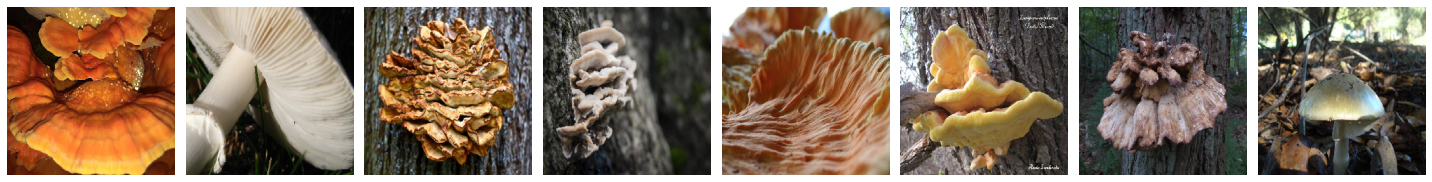

[0. 1. 0. 0. 0. 0. 0. 1.]


In [612]:
plotImages(X_train)
print(y_train[:8])

### 0 = Not Poisonous and 1 = Poisonous

# STEP 3: DATA PREPARATION

In [613]:
# get the shape without the sampling
Input_shape = X_train.shape[1:]
Input_shape

(256, 256, 3)

# STEP 4: TRAIN THE MODEL

In [614]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [615]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=Input_shape))
cnn_model.add(AveragePooling2D())
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
cnn_model.add(AveragePooling2D())
cnn_model.add(Dropout(0.3))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=64, activation='relu'))

cnn_model.add(Dense(units=32, activation='relu'))

cnn_model.add(Dense(units=2, activation = 'softmax'))

cnn_model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 254, 254, 16)      448       
_________________________________________________________________
average_pooling2d_27 (Averag (None, 127, 127, 16)      0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
average_pooling2d_28 (Averag (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 123008)          

In [616]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.0001),metrics =['accuracy'])

In [617]:
history = cnn_model.fit(X_train,
                        y_train,
                        nb_epoch=25,
                        batch_size=50,
                        verbose=1,
                        validation_data = (X_validation,y_validation))

/anaconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 962 samples, validate on 206 samples
Epoch 1/25
962/962 [==============================] - 46s 47ms/step - loss: 0.6486 - accuracy: 0.6123 - val_loss: 0.5796 - val_accuracy: 0.6359
Epoch 2/25
962/962 [==============================] - 35s 36ms/step - loss: 0.5323 - accuracy: 0.7266 - val_loss: 0.5511 - val_accuracy: 0.7524
Epoch 3/25
962/962 [==============================] - 35s 36ms/step - loss: 0.5015 - accuracy: 0.7495 - val_loss: 0.5195 - val_accuracy: 0.6748
Epoch 4/25
962/962 [==============================] - 35s 36ms/step - loss: 0.4084 - accuracy: 0.8056 - val_loss: 0.3963 - val_accuracy: 0.8398
Epoch 5/25
962/962 [==============================] - 32s 33ms/step - loss: 0.3185 - accuracy: 0.8711 - val_loss: 0.3650 - val_accuracy: 0.8350
Epoch 6/25
962/962 [==============================] - 31s 33ms/step - loss: 0.2744 - accuracy: 0.8909 - val_loss: 0.3736 - val_accuracy: 0.8398
Epoch 7/25
962/962 [==============================] - 34s 35ms/step - loss: 0.2556 - accur

# STEP 5: EVALUATE THE MODEL

In [618]:
score = cnn_model.evaluate(X_test, y_test,verbose=0)
print(score)

[0.27912669390150646, 0.8834951519966125]


In [619]:
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8835


In [620]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

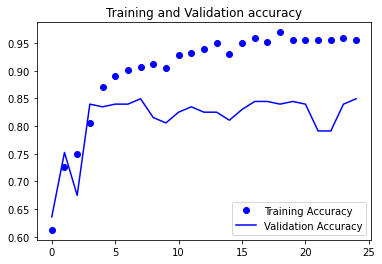

In [621]:
accuracy_cnn = history.history['accuracy']
val_accuracy_cnn = history.history['val_accuracy']

loss_cnn = history.history['loss']
val_loss_cnn = history.history['val_loss']

epochs_cnn = range(len(accuracy_cnn))

plt.plot(epochs_cnn, accuracy_cnn, 'bo', label='Training Accuracy')
plt.plot(epochs_cnn, val_accuracy_cnn, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

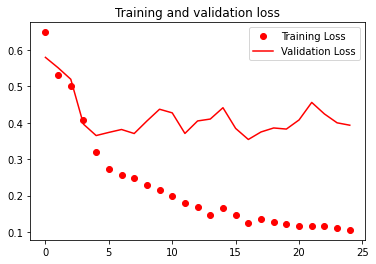

In [622]:
plt.plot(epochs_cnn, loss_cnn, 'ro', label='Training Loss')
plt.plot(epochs_cnn, val_loss_cnn, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [623]:
y_predict = cnn_model.predict(X_test)
y_pred = y_predict[:,1]

In [624]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)
print(predicted_classes)
#get the indices to be plotted
print(y_test)

[0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1
 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1
 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1
 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0
 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1
 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1]
[0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 

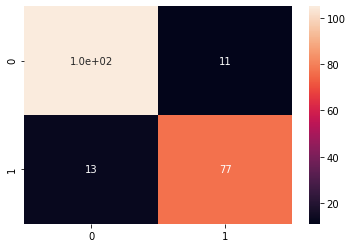

In [625]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot=True)

In [626]:
cm_df = pd.DataFrame(cm)

In [627]:
cm_df.columns = ['Predicted Not Poisonous', 'Predicted Poisonous']
cm_final_df = cm_df.rename(index={0: 'Actually Not Poisonous', 1: 'Actually Poisonous'})
cm_final_df

,Predicted Not Poisonous,Predicted Poisonous
Actually Not Poisonous,105,11
Actually Poisonous,13,77


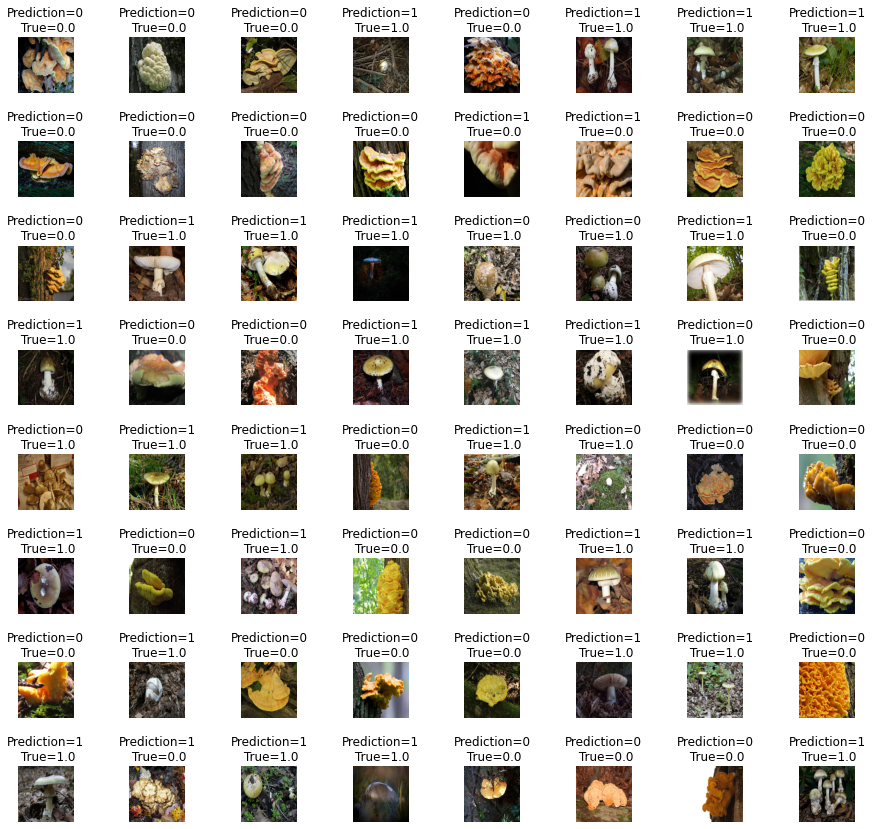

In [628]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (15,15))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)
# will reference 

# STEP 6: CHANGING THE THRESHOLD

In [629]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [630]:
print(y_pred)

[5.19426428e-02 3.60910833e-01 8.44722427e-03 7.57556379e-01
 4.99522896e-04 9.96777475e-01 8.37157965e-01 9.84159350e-01
 9.35727614e-04 4.18821573e-01 1.04308920e-02 5.86037408e-04
 7.52166450e-01 8.89955342e-01 9.29740418e-05 3.11490643e-04
 1.67303998e-03 9.96954322e-01 9.99803841e-01 9.45770085e-01
 1.64838299e-01 3.48794341e-01 9.99958158e-01 3.69469239e-03
 9.83569801e-01 8.25709775e-02 1.15147501e-04 9.89657819e-01
 8.01165879e-01 9.95576143e-01 2.90732551e-02 8.91418487e-04
 2.08830903e-03 8.79414260e-01 7.50914276e-01 7.66100828e-03
 6.84780657e-01 2.97405660e-01 2.34776502e-03 4.33062778e-05
 9.95626330e-01 1.11186933e-02 9.68099713e-01 1.37769399e-04
 1.41821634e-02 9.98417854e-01 9.99117672e-01 2.50496552e-04
 1.70704225e-04 9.94691551e-01 1.26565661e-04 7.93114305e-05
 1.48939667e-03 9.18247938e-01 5.03093243e-01 9.92055175e-06
 9.90220785e-01 9.25170541e-01 7.31751859e-01 9.86940444e-01
 2.38395240e-02 5.76266728e-04 6.60122123e-06 9.97267723e-01
 3.83974766e-05 3.828679

In [631]:
precision_score(y_test, predicted_classes)

0.875

**Precision answers the question**: How correct am I predicting poisonous mushrooms? produces no false positives has a precisions of 1

In [632]:
recall_score(y_test, predicted_classes)

0.8555555555555555

**Recall answers the question**: Out of all the poisonous mushrooms what is the amount of poisonous mushrooms that predicted correctly? produces no false negatives has a recall of 1

In [633]:
f1_score(y_test, predicted_classes)

0.8651685393258427

**F1**: It is the weighted average of precision and recall. It takes both false positives and false negatives into account. It is an overall measure of a model's accuracy that combiens precisiona nd recall. 

**Formula**: 
F1 = 2 * (precision * recall)/(precision + recall)

In [634]:
# Make probabilistic predictions (scores)
y_proba = cnn_model.predict_proba(X_test)[:,1]

# First calculate precision and recall using the default (0.5) cut-off
y_threshold = np.where(y_proba > 0.5, 1, 0)
print("Threshold of 0.5:")
print(f"Precision score: {precision_score(y_test, y_threshold)}")
print(f"Recall score: {recall_score(y_test, y_threshold)}")
print("")

# Calculate the same using a much lower cut-off (0.2)
y_threshold = np.where(y_proba > 0.2, 1, 0)
print("Threshold of 0.2:")
print(f"Precision score: {precision_score(y_test, y_threshold)}")
print(f"Recall score: {recall_score(y_test, y_threshold)}")

Threshold of 0.5:
Precision score: 0.875
Recall score: 0.8555555555555555

Threshold of 0.2:
Precision score: 0.8058252427184466
Recall score: 0.9222222222222223


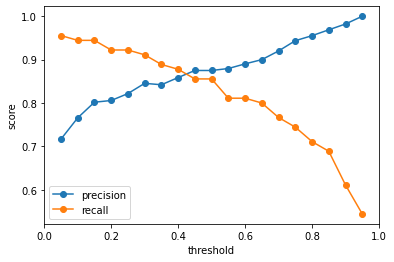

In [635]:
from sklearn.metrics import accuracy_score

# Vary thresholds by 0.05 from 0.05 to 0.95
thresholds = np.arange(0.05, 1, 0.05)

precisions = list()
recalls = list()

for threshold in thresholds:

    # Apply threshold
    y_threshold = np.where(y_proba > threshold, 1, 0)
    
    # Calculate precision and recall
    precision = precision_score(y_test, y_threshold)
    recall = recall_score(y_test, y_threshold)
    
    # Append to list
    precisions.append(precision)
    recalls.append(recall)

# Visualize the result
plt.figure()
plt.plot(thresholds, precisions, label='precision', marker='o')
plt.plot(thresholds, recalls, label='recall', marker='o')
plt.xlim(0, 1)
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend()
plt.show()

## Confusion Matrix with the Changed Threshold

In [636]:
y_pred2 = np.where(y_pred >= 0.2, 1, 0)

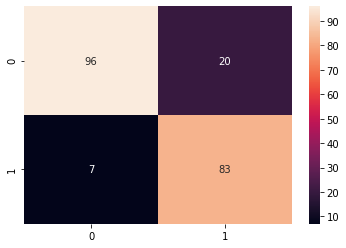

In [637]:
change_threshold_cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize = (6,4))
sns.heatmap(change_threshold_cm, annot=True)

In [638]:
threshold_df = pd.DataFrame(change_threshold_cm)

In [639]:
threshold_df.columns = ['Predicted Not Poisonous', 'Predicted Poisonous']
threshold_final_df = threshold_df.rename(index={0: 'Actually Not Poisonous', 1: 'Actually Poisonous'})
threshold_final_df

,Predicted Not Poisonous,Predicted Poisonous
Actually Not Poisonous,96,20
Actually Poisonous,7,83


# STEP 7: MODEL AUGMENTATION

**Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, shifting, changing the brightness and rotating the original images.**


In [648]:
X_train_aug = X_train.astype('float32')
X_test_aug = X_test.astype('float32')
X_validation_aug = X_validation.astype('float32')

In [650]:
X_train_aug.shape

(962, 256, 256, 3)

# DATA VISUALIZATION FOR AUGMENTED IMAGES

In [651]:
# n represents 10 images for each batch
n = 10

X_train_sample_aug = X_train_aug[:n]

In [652]:
X_train_sample_aug.shape

(10, 256, 256, 3)

In [653]:
aug_train = ImageDataGenerator(rotation_range=90)
aug_train.fit(X_train_sample_aug)

In [654]:
from keras.preprocessing.image import array_to_img

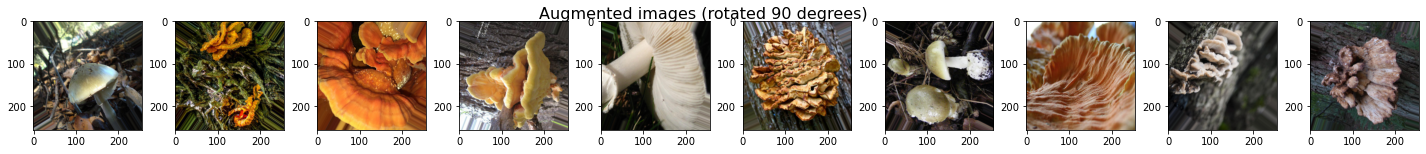

In [655]:
fig = plt.figure(figsize = (25,2))
for x_batch in aug_train.flow(X_train_sample_aug, batch_size = n):
     for i in range(0,n):
            ax = fig.add_subplot(1, n, i+1)
            ax.imshow(array_to_img(x_batch[i]))
     fig.suptitle('Augmented images (rotated 90 degrees)', fontsize=16)
     plt.show()
     break;


# MODEL TRAINING WITH THE AUGMENTED DATASET

In [657]:
aug_gen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True
                             )

In [658]:
aug_gen.fit(X_train)

In [665]:
history_aug = cnn_model.fit_generator(aug_gen.flow(X_train_aug, y_train, batch_size = 32), epochs = 25, validation_data = (X_validation_aug,y_validation))

Epoch 1/25
31/31 [==============================] - 49s 2s/step - loss: 0.1914 - accuracy: 0.9231 - val_loss: 0.2570 - val_accuracy: 0.8981
Epoch 2/25
31/31 [==============================] - 36s 1s/step - loss: 0.2280 - accuracy: 0.9064 - val_loss: 0.2760 - val_accuracy: 0.9078
Epoch 3/25
31/31 [==============================] - 48s 2s/step - loss: 0.1995 - accuracy: 0.9127 - val_loss: 0.2599 - val_accuracy: 0.9078
Epoch 4/25
31/31 [==============================] - 45s 1s/step - loss: 0.2119 - accuracy: 0.9127 - val_loss: 0.2731 - val_accuracy: 0.8883
Epoch 5/25
31/31 [==============================] - 48s 2s/step - loss: 0.1914 - accuracy: 0.9158 - val_loss: 0.2541 - val_accuracy: 0.9078
Epoch 6/25
31/31 [==============================] - 50s 2s/step - loss: 0.2724 - accuracy: 0.8960 - val_loss: 0.2742 - val_accuracy: 0.8932
Epoch 7/25
31/31 [==============================] - 46s 1s/step - loss: 0.1989 - accuracy: 0.9179 - val_loss: 0.2674 - val_accuracy: 0.8932
Epoch 8/25
31/31 [==

In [667]:
history_aug.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [669]:
val_accuracy_aug = history_aug.history['val_accuracy']

In [674]:
epochs_aug = range(len(val_accuracy_aug))

In [675]:
model_compare = pd.DataFrame({'Validation Accuracy CNN':val_accuracy_cnn, 'Validation Accuracy Augmentation':val_accuracy_aug, 'Epochs':epochs_aug})

In [678]:
model_compare.to_csv('/Users/sophie/Desktop/compare_model.csv')

# AUGMENTED MODEL EVALUATION 

In [666]:
score = cnn_model.evaluate(X_test_aug, y_test)
print('Test accuracy', score[1])

206/206 [==============================] - 3s 16ms/step
Test accuracy 0.9077669978141785


In [679]:
predicted_classes_aug = cnn_model.predict_classes(X_test_aug)

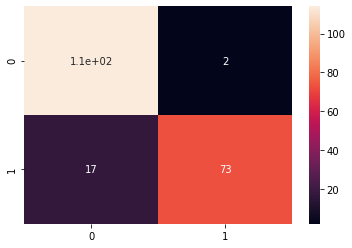

In [680]:
aug_cm_eva = confusion_matrix(y_test, predicted_classes_aug)
plt.figure(figsize = (6,4))
sns.heatmap(aug_cm_eva, annot=True)

# STEP 8: VGG16 MODEL

**How to fine-tune a pre-trained model, called VGG16, that we'll modify to predict on images of cats and dogs with TensorFlow's Keras API.**

# CREATING THE MODEL

In [682]:
#Keras has a library of pre-trained model able to pull down for fine tuning 
vgg16_model = keras.applications.vgg16.VGG16()

In [683]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

**The last layer has 1000 layers and I will not classifying on 1000 categories. My model will only have 2 categories.**

In [684]:
vgg16_model.layers.pop()

In [685]:
# Sequential
new_model = keras.Sequential() 
for layer in vgg16_model.layers: # iterate all throughout the VGG Model and add the sequential layer to it
    new_model.add(layer)

In [686]:
new_model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [687]:
# exclude from future training, good for fine tuning - exactly how they are in terms of their weight 
for layer in model.layers:
    layer.trainable = False 

In [688]:
new_model.add(Dense(2, activation='softmax'))

In [689]:
new_model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

# TRAIN THE FINE-TUNED NEW_MODEL 

In [690]:
train_path = '/Users/sophie/Desktop/test_image/Training'
valid_path = '/Users/sophie/Desktop/test_image/Validation'
test_path = '/Users/sophie/Desktop/test_image/Test'

image_gen = ImageDataGenerator() # create a data generator rescale= 1. /255

train_batches = image_gen.flow_from_directory(
    train_path,
    classes=['poisonous', 'non_poisonous'],
    target_size=(224, 224),
    batch_size=48 # change this to a smaller number for plotting such as 20
)
validation_batches = image_gen.flow_from_directory(
    valid_path,
    classes=['poisonous', 'non_poisonous'],
    target_size=(224, 224),
    batch_size=10 # change this to a smaller number when plotting also around 20 for visibility 
)

test_batches = image_gen.flow_from_directory(
    test_path,
    classes=['poisonous', 'non_poisonous'],
    target_size=(224, 224),
    batch_size=206 # change this to a lower number for plotting 
)

Found 962 images belonging to 2 classes.
Found 206 images belonging to 2 classes.
Found 206 images belonging to 2 classes.


In [691]:
new_model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [694]:
history_new = new_model.fit_generator(train_batches,
                        steps_per_epoch=20,
                        validation_data = validation_batches,
                        validation_steps=20,
                        epochs=5,
                        verbose=1)

Epoch 1/5
20/20 [==============================] - 1187s 59s/step - loss: 0.3777 - accuracy: 0.8567 - val_loss: 0.7998 - val_accuracy: 0.7550
Epoch 2/5
20/20 [==============================] - 1158s 58s/step - loss: 0.2624 - accuracy: 0.8764 - val_loss: 0.0030 - val_accuracy: 0.9388
Epoch 3/5
20/20 [==============================] - 1250s 63s/step - loss: 0.1297 - accuracy: 0.9573 - val_loss: 0.1091 - val_accuracy: 0.9031
Epoch 4/5
20/20 [==============================] - 1126s 56s/step - loss: 0.1257 - accuracy: 0.9574 - val_loss: 1.4696 - val_accuracy: 0.8673
Epoch 5/5
20/20 [==============================] - 1278s 64s/step - loss: 0.1303 - accuracy: 0.9531 - val_loss: 0.1527 - val_accuracy: 0.9388


In [695]:
history_new.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [696]:
val_accuracy_new = history_new.history['val_accuracy']

In [698]:
new_df = pd.DataFrame({'epochs':[1, 2, 3, 4, 5], 'Validation Accuracy VGG': val_accuracy_new})

In [ ]:
new_df.to_csv('')

# FINE-TUNED MODEL EVALUATION 

In [546]:
X_test_new, y_test_new = next(test_batches)

In [547]:
def plotImages2(images_arr):
    fig, axes = plt.subplots(1, 6, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        img = np.array(img).astype(np.uint8)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

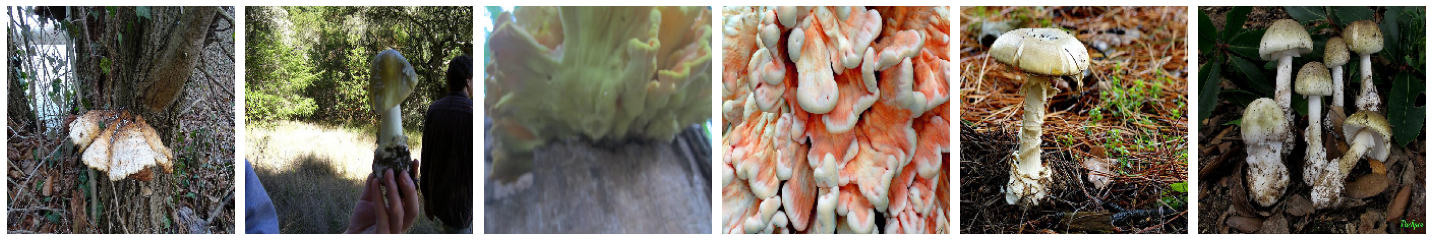

[0. 1. 0. 0. 1. 1.]


In [565]:
plotImages2(X_test_new)
y_test2 = y_test_new[:,0]
print(y_test2[:6])

### 0 is not poisonous and 1 is poisonous

In [574]:
print(y_test2)

[0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.]


In [550]:
score = new_model.evaluate(X_test_new, y_test_new,verbose=0)

In [551]:
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.9417


In [575]:
predictions = new_model.predict_generator(test_batches, steps=1, verbose=0)

In [576]:
cm2 = confusion_matrix(y_test2, np.round(predictions[:,0]))

In [577]:
cm2

array([[109,   7],
       [  5,  85]])

In [598]:
new_model_cm2 = pd.DataFrame(cm2)

In [583]:
new_model_cm2.columns = ['Predicted Not Poisonous', 'Predicted Poisonous']
cm2_df = new_model_cm2.rename(index={0: 'Actually Not Poisonous', 1: 'Actually Poisonous'})
cm2_df

,Predicted Not Poisonous,Predicted Poisonous
Actually Not Poisonous,109,7
Actually Poisonous,5,85


In [587]:
history_new.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

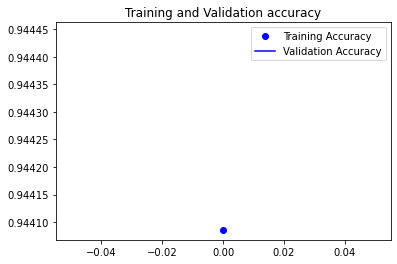

In [588]:
accuracy_new = history_new.history['accuracy']
val_accuracy_new = history_new.history['val_accuracy']
loss_new = history_new.history['loss']
val_loss_new = history_new.history['val_loss']

epochs_new = range(len(accuracy_new))

plt.plot(epochs_new, accuracy_new, 'bo', label='Training Accuracy')
plt.plot(epochs_new, val_accuracy_new, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

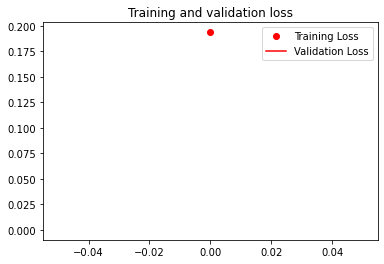

In [590]:
plt.plot(epochs_new, loss_new, 'ro', label='Training Loss')
plt.plot(epochs_new, val_loss_new, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()